## Overview

A place to make plots for AnVIL.

                                       Project     WGS    WES  \
0                                 1000 Genomes    3775      0   
1                                       eMERGE    1800   3745   
2                                         GTEx     652    610   
3                                       ENCODE       0      0   
4   Centers for Common Disease Genomics (CCDG)  200000      0   
5         Centers for Mendelian Genomics (CMG)       0  20000   
6                                          HCA       0      0   
7                             All of Us (AoU)    80000      0   
8                      Million Veterns Program    2000  28000   
9                                       TOPMed  100000      0   
10          Gabriella Miller Kids First (GMKF)   50000      0   
11                                        TCGA    2500  10544   
12                                      TARGET       0    281   
13                                        ICGC    5000      0   

    Genotyping Array  mR

ValueError: 'label' must be of length 'x'

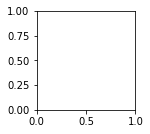

In [13]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import urllib.parse
import urllib.request
import json

# this allows plots to appear directly in the notebook
%matplotlib inline

# Some data

data = pd.read_csv('datasets.tsv', sep='\t')
print(data)

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
labels = list(data.columns.values)
labels = labels[1:14]
print(labels)
fracs = [15, 30, 45, 10]
fracs = 

explode = (0, 0.05, 0, 0)

# Make square figures and axes

the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

plt.subplot(the_grid[0, 1], aspect=1)

plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)

plt.subplot(the_grid[1, 0], aspect=1)

patches, texts, autotexts = plt.pie(fracs, labels=labels,
                                    autopct='%.0f%%',
                                    shadow=True, radius=0.5)
                                    
plt.subplot(the_grid[1, 1], aspect=1)

# Turn off shadow for tiny plot with exploded slice.
patches, texts, autotexts = plt.pie(fracs, explode=explode,
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=0.5)